<div style="
    background-color:#104e8b;
    border-left: 5px solid #f8f8ff;
    border-right: 5px solid #f8f8ff;
    border-top: 5px solid #f8f8ff;
    border-bottom: 5px solid #f8f8ff;
    padding: 10px;
    border-radius: 5px;
">
<h1><font color='White'><center><b>✈️ FLIGHT PRICE PREDICTION.</h1></font></b>
</div>

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Importing necessary libraries.</h2></font>
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Importing Dataset.</h2></font>
</div>

In [5]:
train=pd.read_excel(r"C:\Users\shashnk\Downloads\ML Advanced Exam Paper\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")
test=pd.read_excel(r"C:\Users\shashnk\Downloads\ML Advanced Exam Paper\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Test.xlsx")

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Basic Info about Dataset.</h2></font>
</div>

### ➡️ Top 5 values in Train and Test datset

In [8]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### ➡️ Five lower values of Train and Test Dataset

In [11]:
train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


### ➡️ Checking columns of datsets.

In [14]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### ➡️ Checking shape of datsets.

In [17]:
train.shape

(10683, 11)

In [18]:
test.shape

(2671, 10)

### ➡️ Checking null values in dataset

In [20]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### ➡️ Checking info about Dataset

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [24]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Data Cleaning and Preprocessing.</h2></font>
</div>

### ➡️ Unique Values in all Columns

In [27]:
for col in train.select_dtypes(include="object").columns:
    print(f'\n Column:{col}')
    print(train[col].unique())
    


 Column:Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

 Column:Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

 Column:Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

 Column:Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

 Column:Route
['BLR → DEL' 'CCU → IXR → BBI → B

In [28]:
train['Route'].nunique()

128

### 📝Insights:
- The 'route' column will be dropped due to its high cardinality (a very large number of unique values). Applying standard techniques like one-hot encoding to this column would be impractical, as it would create an excessive number of new features, leading to the curse of dimensionality and poor model performance.
- We can drop that column. The information it contains is already captured by the Source, Destination, and total_stops features.

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Changing Datattypes of all columns.</h2></font>
</div>

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


 ### ➡️ Extracting only date from `Date_of_Journey` column

In [33]:
train['journey_Date']=pd.to_datetime(train['Date_of_Journey'],dayfirst=True).dt.day
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1


### ➡️ Extracting only month from `Date_of_Journey` column

In [35]:
train['journey_Month']= pd.to_datetime(train['Date_of_Journey'],dayfirst=True).dt.month
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


### ➡️ Extracting only day from `Date_of_Journey` column

In [37]:
train['journey_Day']=pd.to_datetime(train['Date_of_Journey'],dayfirst=True).dt.day_name()
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday


<b>NOTE</b>: "Since the entire dataset is from 2019, extracting the year from the Date_of_Journey column is unnecessary."

#### We have converted the `Date_of_Journey` column to the appropriate datatype and extracted all necessary information for further analysis, so this column can now be safely dropped."

In [40]:
train.drop(columns='Date_of_Journey',inplace=True)

In [41]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday


In [42]:
train['duration']=(pd.to_timedelta(train['Duration']).dt.total_seconds() // 60).astype(int)
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,445


<div style="
    background-color:#5f9ea0;
    padding: 10px;
    border-radius: 5px;
    
">
<h2><b><font color='White'> <center> 🙇 EDA (Exploratory Data Analysis).</h2></font></b></center> 
    </div>
  


<div style="
    background-color:#5f9ea0;
    padding: 10px;
    border-radius: 5px;
">
<h1><font color='White'><center><b> 🙇 EDA (Exploratory Data Analysis).  </h1></font>
</div>


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Distribution of Flights by Departure Time</h2></font>
</div>


In [46]:
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'], format='%H:%M')
train['Dep_hour'] = train['Dep_Time'].dt.hour
train['Dep_minutes'] = (train['Dep_Time'].dt.hour * 60) + train['Dep_Time'].dt.minute

In [47]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day,duration,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,170,22,1340
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,445,5,350


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10683 non-null  datetime64[ns]
 5   Arrival_Time     10683 non-null  object        
 6   Duration         10683 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10683 non-null  object        
 9   Price            10683 non-null  int64         
 10  journey_Date     10683 non-null  int32         
 11  journey_Month    10683 non-null  int32         
 12  journey_Day      10683 non-null  object        
 13  duration         10683 non-null  int32         
 14  Dep_hour         10683 non-null  int32

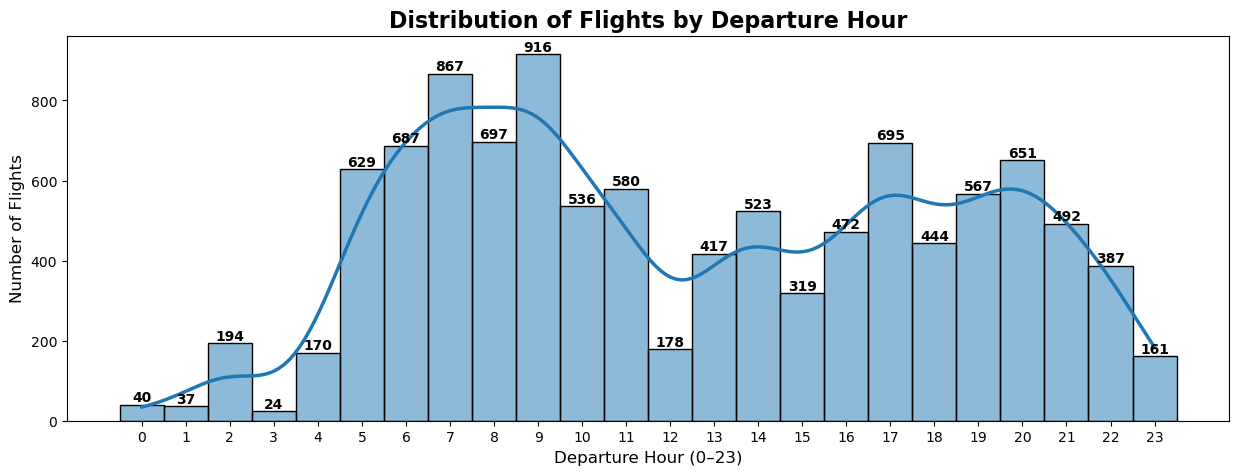

In [49]:
plt.figure(figsize=(15,5))
ax=sns.histplot(data=train, x='Dep_hour',bins=24,discrete=True, kde= True, line_kws= {"linewidth":2.5})
ax.bar_label(ax.containers[0], fontweight='bold')
plt.xticks(range(0,24))
plt.title("Distribution of Flights by Departure Hour", fontsize=16, weight='bold')
plt.xlabel("Departure Hour (0–23)", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.show()

#### 📝Insights:
- "The graph shows a bimodal distribution, indicating people fly more in the morning and evening. However, the morning peak is higher, suggesting people prefer morning flights."

🌅 Why Morning Flights Tend to Be Cheaper:
- Lower demand: Fewer people want to wake up at 3 AM to catch a flight, so airlines drop prices to fill seats.
- Operational efficiency: Early flights are less likely to be delayed because airports are less crowded and aircraft are already stationed from overnight.
- Dynamic pricing: Airlines use algorithms that adjust fares based on demand — and early morning slots often have lower demand.


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'>   Distribution of Flights by Arrival Time</h2></font>
</div>


In [53]:
train['Arrival_Time']=train['Arrival_Time'].str.split().str[0]
train['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [54]:
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'], format='%H:%M')
train['Arrival_hour'] = train['Arrival_Time'].dt.hour
train['Arrival_minutes'] = (train['Arrival_Time'].dt.hour * 60) + train['Arrival_Time'].dt.minute

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10683 non-null  datetime64[ns]
 5   Arrival_Time     10683 non-null  datetime64[ns]
 6   Duration         10683 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10683 non-null  object        
 9   Price            10683 non-null  int64         
 10  journey_Date     10683 non-null  int32         
 11  journey_Month    10683 non-null  int32         
 12  journey_Day      10683 non-null  object        
 13  duration         10683 non-null  int32         
 14  Dep_hour         10683 non-null  int32

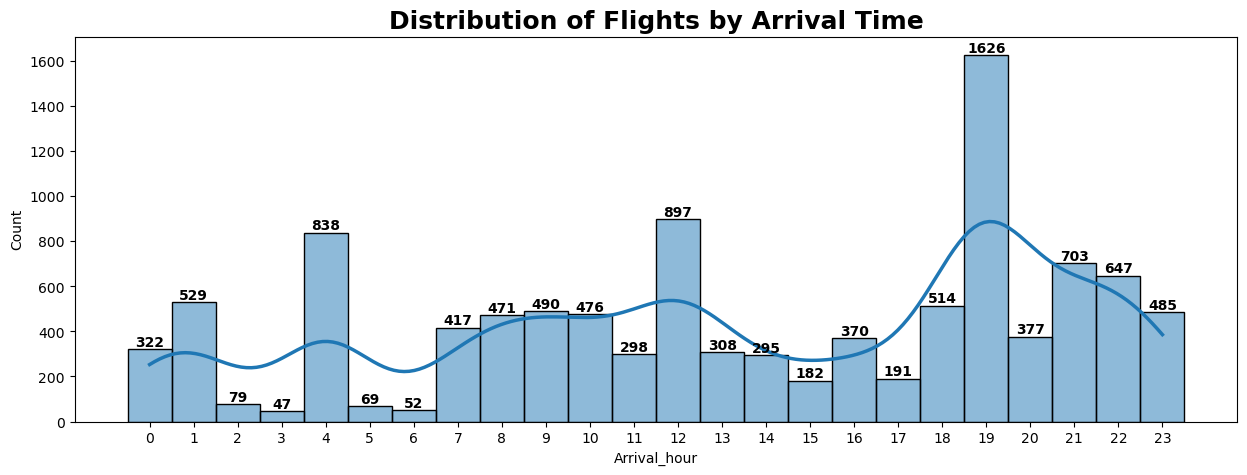

In [56]:
plt.figure(figsize=(15,5))
ax=sns.histplot(data=train, x='Arrival_hour', bins=24, discrete=True, edgecolor='black', kde= True, line_kws= {'linewidth': 2.5})
ax.bar_label(ax.containers[0], fontweight='bold')
plt.xticks(range(0,24))
plt.title("Distribution of Flights by Arrival Time",fontsize=18,weight='bold')
plt.show()

#### 📝 Insights:
- As we can see that <b>1626 out of 10683 (15.22%)</b> of the flights lands between <b>18:30 to 19:30 hours</b>, representing the peak arrival window. This pattern suggests that a large portion of passengers travel back from business or official activities around the close of the workday.
    Similarly, only 47 flights (out of 10,683) arrived between 03:00 and 04:00 hours, making it the least active period of the day.
- Although there isn’t a very strong pattern throughout the day, it can be observed that passengers generally avoid early morning arrivals, except for a smaller cluster of flights landing between 4:00 and 5:00 AM, which might represent overnight or long-haul flights.

In [58]:
# Checking whether the graph is showing correct results or not and we found that there are 1472 rows between 18:30 to 19:30, which means the bar is accurate. 
train[(train['Arrival_Time'].dt.hour>18.5) & (train['Arrival_Time'].dt.hour<19.5)]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day,duration,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1900-01-01 11:25:00,1900-01-01 19:15:00,7h 50m,1 stop,No info,8625,27,5,Monday,470,11,685,19,1155
14,IndiGo,Kolkata,Banglore,CCU → BLR,1900-01-01 17:15:00,1900-01-01 19:50:00,2h 35m,non-stop,No info,4804,24,4,Wednesday,155,17,1035,19,1190
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,1900-01-01 16:40:00,1900-01-01 19:15:00,26h 35m,2 stops,No info,14011,3,3,Sunday,1595,16,1000,19,1155
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,1900-01-01 20:15:00,1900-01-01 19:15:00,23h,2 stops,No info,13381,12,6,Wednesday,1380,20,1215,19,1155
20,GoAir,Delhi,Cochin,DEL → BOM → COK,1900-01-01 14:10:00,1900-01-01 19:20:00,5h 10m,1 stop,No info,19495,6,3,Wednesday,310,14,850,19,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,1900-01-01 11:40:00,1900-01-01 19:00:00,7h 20m,2 stops,No info,21219,9,5,Thursday,440,11,700,19,1140
10669,Air India,Delhi,Cochin,DEL → BOM → COK,1900-01-01 08:00:00,1900-01-01 19:15:00,11h 15m,1 stop,No info,9929,15,6,Saturday,675,8,480,19,1155
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,1900-01-01 23:05:00,1900-01-01 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6,Thursday,1195,23,1385,19,1140
10676,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1900-01-01 10:20:00,1900-01-01 19:00:00,8h 40m,1 stop,No info,9794,1,5,Wednesday,520,10,620,19,1140


In [59]:
train['Arrival_Time'].min()

Timestamp('1900-01-01 00:05:00')

In [60]:
train['Arrival_Time'].max()

Timestamp('1900-01-01 23:55:00')

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Distribution of Flights by Source City </h2></font></h2></b>

</div>

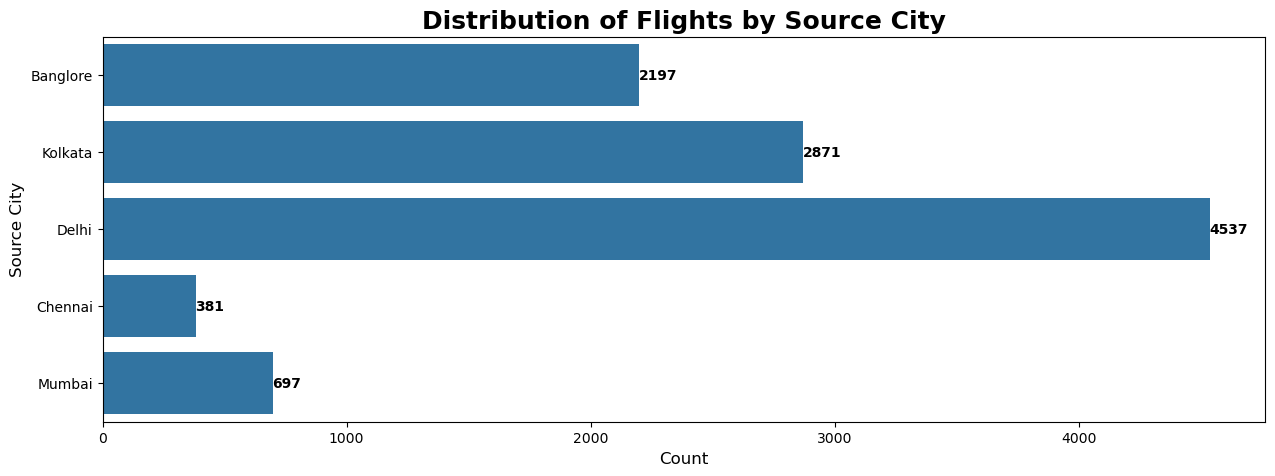

In [62]:
plt.figure(figsize=(15,5))
ax=sns.countplot(train['Source'])
ax.bar_label(ax.containers[0], fontweight='bold')
plt.title("Distribution of Flights by Source City",fontsize=18,weight='bold')
plt.xlabel("Count",fontsize=12)
plt.ylabel("Source City",fontsize=12)
plt.show()

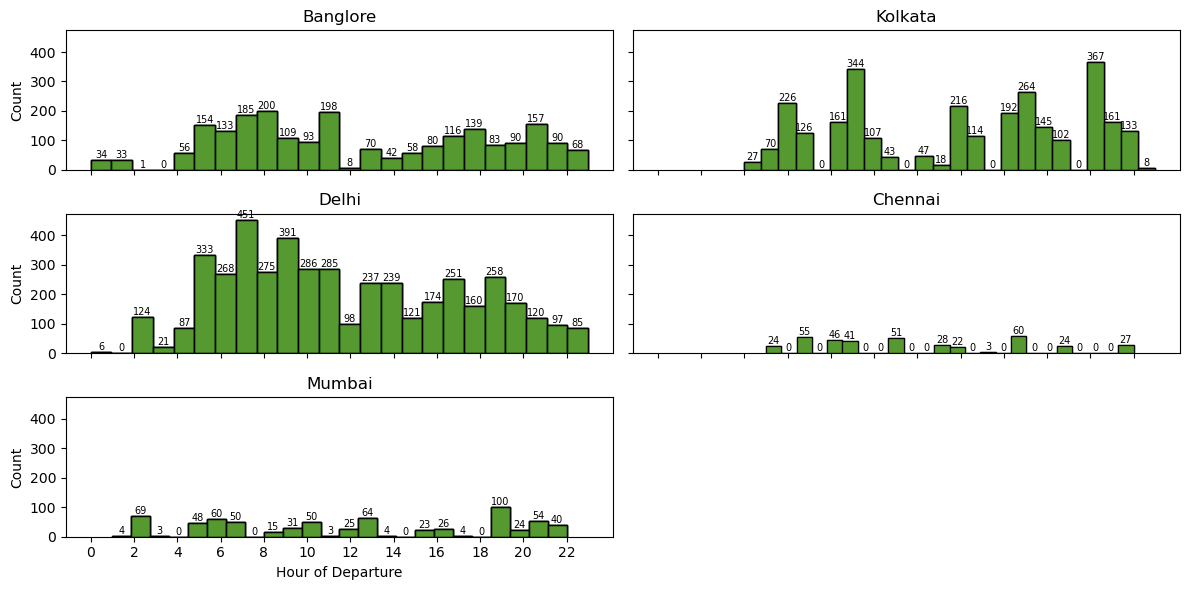

In [63]:
cities = train['Source'].unique()

# Create subplot grid (adjust rows/cols as needed)
n_cities = len(cities)
n_cols = 2
n_rows = (n_cities + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6), sharex=True, sharey=True)

# Flatten axes array for easy looping
axes = axes.flatten()

for i, city in enumerate(cities):
    ax = axes[i]
    city_dep = train.loc[train['Source'] == city, 'Dep_hour']

    sns.histplot(city_dep, bins=24, ax=ax)
    sns.histplot(city_dep, bins=24, ax=ax).bar_label(sns.histplot(city_dep, bins=24, kde=False, ax=ax).containers[0],fontsize=7)
    ax.set_title(f"{city}")
    ax.set_xlabel("Hour of Departure")
    ax.set_ylabel("Count")
    ax.set_xticks(range(0, 24, 2))

# Remove empty subplots if cities < n_rows*n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Distribution of Flight by Destination City </h2></font></h2></b>
<p><font color='black'This section analyzes distibution of flights by Destination City based on the dataset.</p>
</div>


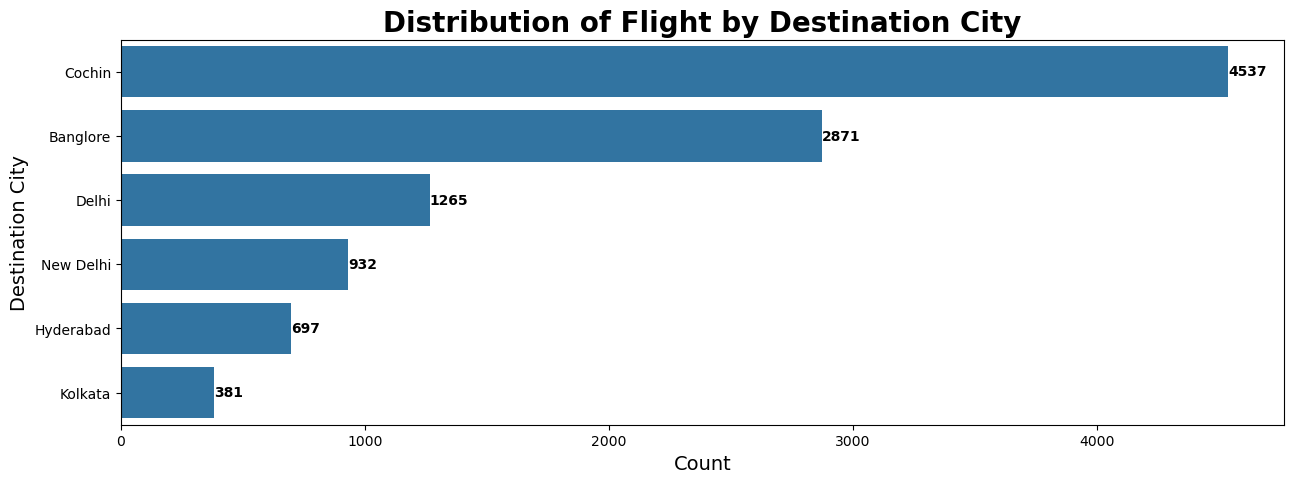

In [65]:
plt.figure(figsize=(15,5))
ax=sns.countplot(train['Destination'], order=train['Destination'].value_counts().index)
ax.bar_label(ax.containers[0],fontweight='bold')
plt.title("Distribution of Flight by Destination City",fontsize=20,weight='bold')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Destination City",fontsize=14)
plt.show()

### 📝Insights:
- "An interesting observation from this chart is that while the majority of flights originate from Delhi, the most common destination city is <b>Cochin (42.46%)</b>. This indicates that Cochin is a highly popular arrival point in this dataset, even though it’s not the leading source city.


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Distribution of Flight by Airlines </h2></font></h2></b>

</div>


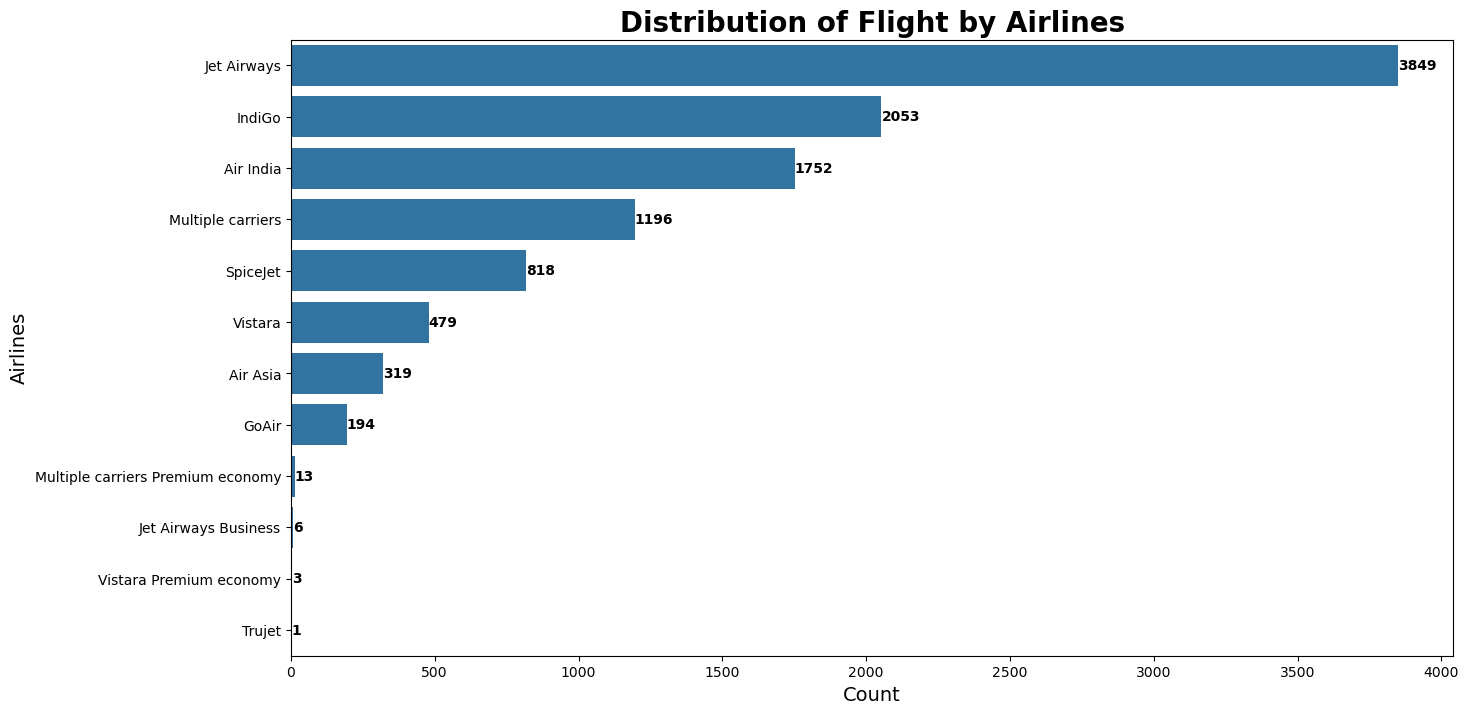

In [68]:
plt.figure(figsize=(15,8))
ax=sns.countplot(train['Airline'], order=train['Airline'].value_counts().index)
ax.bar_label(ax.containers[0],fontweight='bold')
plt.title("Distribution of Flight by Airlines",fontsize=20,weight='bold')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Airlines",fontsize=14)
plt.show()

####  📝 Insights:
- <b>Jet Airways</b> operates the majority of flights, accounting for <b>36.02%</b> of the total.
- If we talk about top five airlines according to this dataset, then it would be:
    - Jet Airways.
    - Indigo.
    - Air India
    - Multiple Carriers.
    - Spicejet. 
- <b>TruJet</b> has the <b>least presence</b> in this dataset, with only <b>1 flight out of 10,683</b> recorded.

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Average Price of Flight by Total Stops </h2></font></h2></b>

</div>


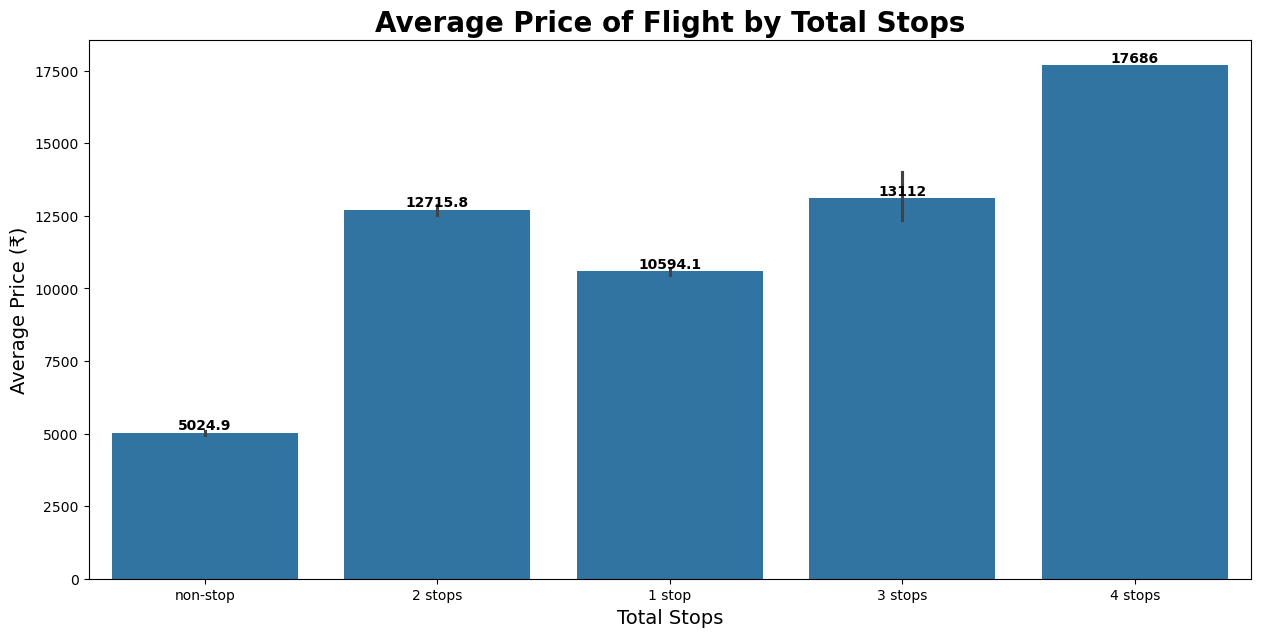

In [71]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=train,x='Total_Stops',y='Price')
ax.bar_label(ax.containers[0], fontweight='bold')
plt.title("Average Price of Flight by Total Stops",fontsize=20,weight='bold')
plt.xlabel("Total Stops",fontsize=14)
plt.ylabel("Average Price (₹)",fontsize=14)
plt.show()

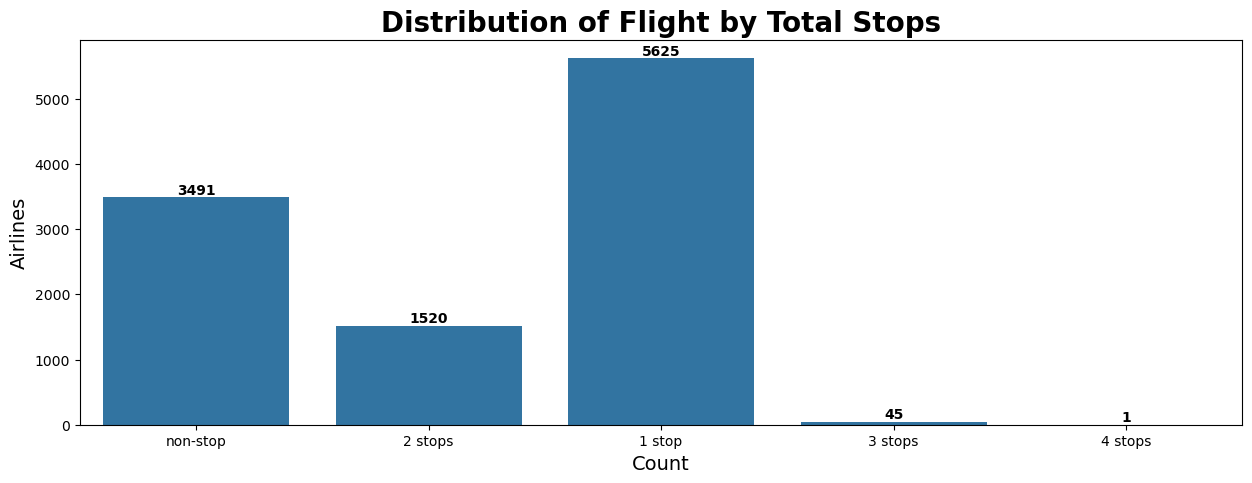

In [72]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data=train,x='Total_Stops')
ax.bar_label(ax.containers[0], fontweight='bold')
plt.title("Distribution of Flight by Total Stops",fontsize=20,weight='bold')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Airlines",fontsize=14)
plt.show()

### 📝 Insights:
- Even though 4-stop flights appear to be the most expensive, they represent a very small fraction of total flights, so their high average might not be significant.
- The low average price for non-stop flights might indicate that short-haul non-stop routes dominate the dataset.
- To get a clearer picture, let's analyze Average Price vs Duration or Distance alongside Stops, which will help confirm if distance explains the trend.

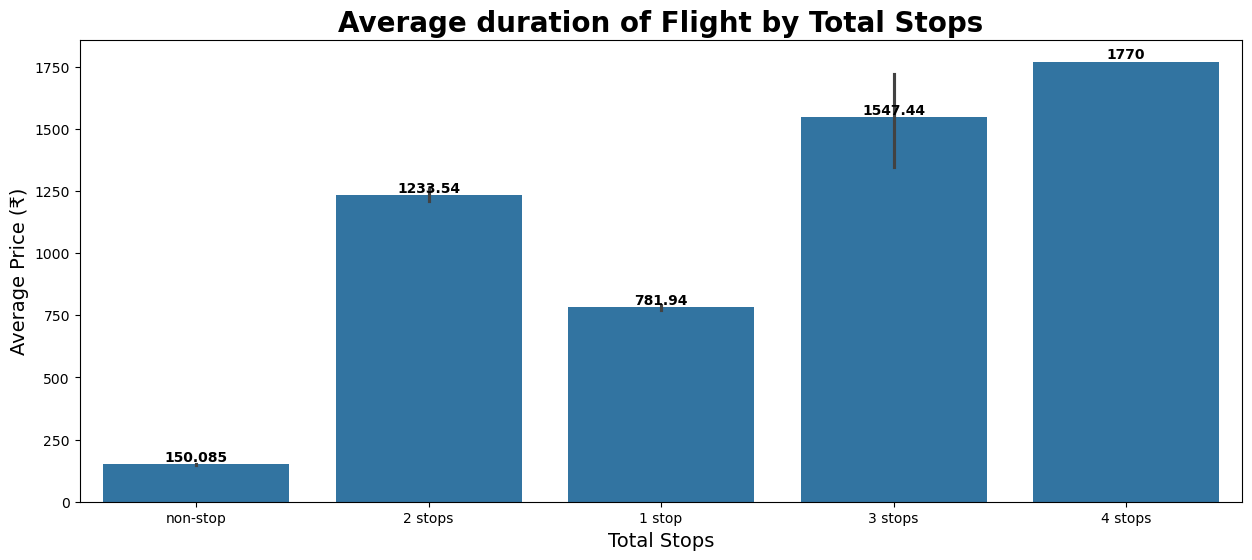

In [74]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=train,x='Total_Stops',y='duration')
ax.bar_label(ax.containers[0], fontweight='bold')
plt.title("Average duration of Flight by Total Stops",fontsize=20,weight='bold')
plt.xlabel("Total Stops",fontsize=14)
plt.ylabel("Average Price (₹)",fontsize=14)
plt.show()

### 📝 Insights:
" So after analysing this graph we can say that Average Price of Flights is getting affected more by Average duration compared to `Total Stops`".

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Dealing with Null Values </h2></font></h2></b>
</div>


In [77]:
train[train.isnull().any(axis=1)]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day,duration,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
9039,Air India,Delhi,Cochin,NaN,1900-01-01 09:45:00,1900-01-01 09:25:00,23h 40m,NaN,No info,7480,6,5,Monday,1420,9,585,9,565


### 📝 Insights:
- "As we can see, there are only two NaN values, both in the same row. Hence, we can safely drop this row to maintain 100% data accuracy."

#### Dropping Nan Values

In [80]:
train.dropna(inplace=True,ignore_index=True)

In [81]:
train.shape

(10682, 18)

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Changing Datatypes of Columns. </h2></font></h2></b>
</div>


In [83]:
for col in train.select_dtypes(include='object').columns:
    train[col]=train[col].astype('category')

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  category      
 1   Source           10682 non-null  category      
 2   Destination      10682 non-null  category      
 3   Route            10682 non-null  category      
 4   Dep_Time         10682 non-null  datetime64[ns]
 5   Arrival_Time     10682 non-null  datetime64[ns]
 6   Duration         10682 non-null  category      
 7   Total_Stops      10682 non-null  category      
 8   Additional_Info  10682 non-null  category      
 9   Price            10682 non-null  int64         
 10  journey_Date     10682 non-null  int32         
 11  journey_Month    10682 non-null  int32         
 12  journey_Day      10682 non-null  category      
 13  duration         10682 non-null  int32         
 14  Dep_hour         10682 non-null  int32

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'>   Dropping unnecessary columns. </h2></font></h2></b>
</div>


In [86]:
train.drop(columns=['Route','Dep_Time','Arrival_Time','Duration','Arrival_hour','Dep_hour'],inplace=True)
train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,journey_Day,duration,Dep_minutes,Arrival_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,Sunday,170,1340,70
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,Wednesday,445,350,795
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,Sunday,1140,565,265
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,Sunday,325,1085,1410
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,Friday,285,1010,1295
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,Tuesday,150,1195,1345
10678,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,Saturday,155,1245,1400
10679,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,Saturday,180,500,680
10680,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,Friday,160,690,850


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Corelation between Columns.   </h2></font></h2></b>
</div>


Text(0.5, 1.0, 'Corelation between Columns.')

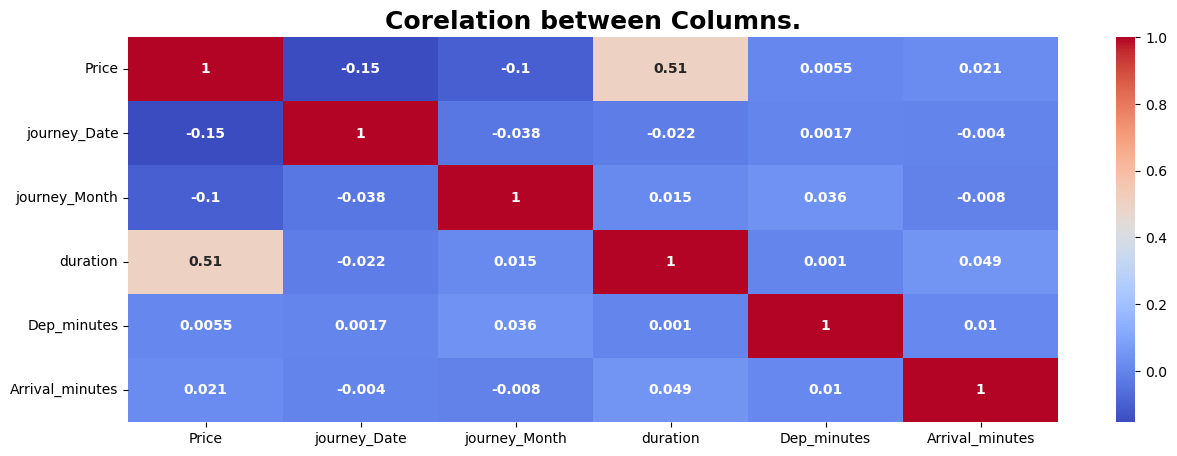

In [88]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(numeric_only=True),cmap='coolwarm',annot=True, annot_kws={'fontweight':'bold'})
plt.title('Corelation between Columns.', fontsize=18, weight='bold')

### 📝 Insights:
##### "The analysis reveals that Duration is the only variable showing a strong positive correlation with Price, implying that flight duration is a key driver of ticket cost."

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Encoding Categorical Columns.   </h2></font></h2></b>
</div>


In [91]:
train=pd.get_dummies(train,columns=train.select_dtypes(include='category').columns, drop_first=True, dtype=int)
train.head()

,Price,journey_Date,journey_Month,duration,Dep_minutes,Arrival_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,journey_Day_Monday,journey_Day_Saturday,journey_Day_Sunday,journey_Day_Thursday,journey_Day_Tuesday,journey_Day_Wednesday
0,3897,24,3,170,1340,70,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,7662,1,5,445,350,795,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,13882,9,6,1140,565,265,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,6218,12,5,325,1085,1410,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,13302,1,3,285,1010,1295,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [92]:
train.columns

Index(['Price', 'journey_Date', 'journey_Month', 'duration', 'Dep_minutes',
       'Arrival_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage inc

<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Splitting data in Feature(x) and Target Column(y).   </h2></font></h2></b>
</div>


In [94]:
x_train=train.drop(columns='Price',axis=1)
y_train=train.Price

In [95]:
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')

x_train Shape: (10682, 44)
y_train Shape: (10682,)


<div style="
    background-color:#e6f2ff;
    border-left: 5px solid #1e90ff;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Scaling for Distance based Algorithms & Encoding Categorical Columns.   </h2></font></h2></b>
</div>


In [97]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [98]:
original_cols= ['duration', 'Dep_minutes', 'Arrival_minutes']
dummy_cols=[ col for col in x_train.columns if col not in original_cols]

In [99]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), original_cols),
        ('cat', 'passthrough', dummy_cols)
    ]
)

In [100]:
train_scaled=preprocessor.fit_transform(x_train)
train_scaled

array([[-0.93149778,  1.64115035, -1.84610463, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38995278, -1.22875413, -0.07486067, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.97867915, -0.60549205, -1.36970108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.91180524, -0.79392012, -0.35581661, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95119033, -0.24313037,  0.05950956, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28164378, -0.34459164,  0.80465357, ...,  1.        ,
         0.        ,  0.        ]])

In [101]:
scaled_train=pd.DataFrame(train_scaled,
             columns=original_cols + dummy_cols,
             index=x_train.index)
scaled_train.head()

,duration,Dep_minutes,Arrival_minutes,journey_Date,journey_Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,journey_Day_Monday,journey_Day_Saturday,journey_Day_Sunday,journey_Day_Thursday,journey_Day_Tuesday,journey_Day_Wednesday
0,-0.931498,1.641150,-1.846105,24.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.389953,-1.228754,-0.074861,1.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.978679,-0.605492,-1.369701,9.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.626263,0.901933,1.427643,12.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.705034,0.684516,1.146687,1.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<div style="
    background-color:#b7950b;
    padding: 10px;
    border-radius: 5px;
    
        ">
        <h2><b><font color='White'> <center> 🤖 Model Training/ Model Building.</h2></font></b></center> 
        </div>

<div style="
    background-color:#9a8722;
    padding: 10px;
    border-radius: 5px;
">
<h1><font color='White'><center><b> 🤖 Model Training/ Model Development   </h1></FONT>
</div>


<div style="
    background-color:#F9E795;
    border-left: 5px solid #b7950b;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<font color='Grey'> Training on Distance Based Algorithms.   </h2></FONT>
</div>


In [105]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [106]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "SGD Regressor": SGDRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR()
}

for name, model in models.items():
    model.fit(scaled_train,y_train)

## 🧐 Model Evaluation.

In [108]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [109]:
results=[]

for name, model in models.items():
    y_pred= model.predict(scaled_train)
    r2= r2_score(y_train, y_pred)
    mae= mean_absolute_error(y_train, y_pred)
    mse= mean_squared_error(y_train, y_pred)
    rmse= root_mean_squared_error(y_train, y_pred)
    results.append([name, mae, mse, rmse, r2])

In [110]:
results

[['Linear Regression',
  1738.7791338244624,
  6227298.90981522,
  2495.4556517428277,
  0.7071489729498317],
 ['Lasso Regression',
  1742.2263912401684,
  6255175.278193843,
  2501.034841459399,
  0.7058380316848731],
 ['Ridge Regression',
  1743.7407172293056,
  6252038.830259849,
  2500.407732802762,
  0.7059855293418928],
 ['SGD Regressor',
  1781.066153107279,
  6752399.543113044,
  2598.537962607636,
  0.682455078856586],
 ['KNN',
  989.2978842913312,
  2955877.813929976,
  1719.2666500371536,
  0.8609940094123593],
 ['SVM',
  3568.650349386006,
  21315685.71568663,
  4616.891347615474,
  -0.002412208650934611]]

In [111]:
results_df= pd.DataFrame(data= results, columns= [ "Name", "MAE", "MSE", "RMSE", "R2_Score"])
results_df

,Name,MAE,MSE,RMSE,R2_Score
0,Linear Regression,1738.779134,6.227299e+06,2495.455652,0.707149
1,Lasso Regression,1742.226391,6.255175e+06,2501.034841,0.705838
2,Ridge Regression,1743.740717,6.252039e+06,2500.407733,0.705986
3,SGD Regressor,1781.066153,6.752400e+06,2598.537963,0.682455
4,KNN,989.297884,2.955878e+06,1719.266650,0.860994
5,SVM,3568.650349,2.131569e+07,4616.891348,-0.002412


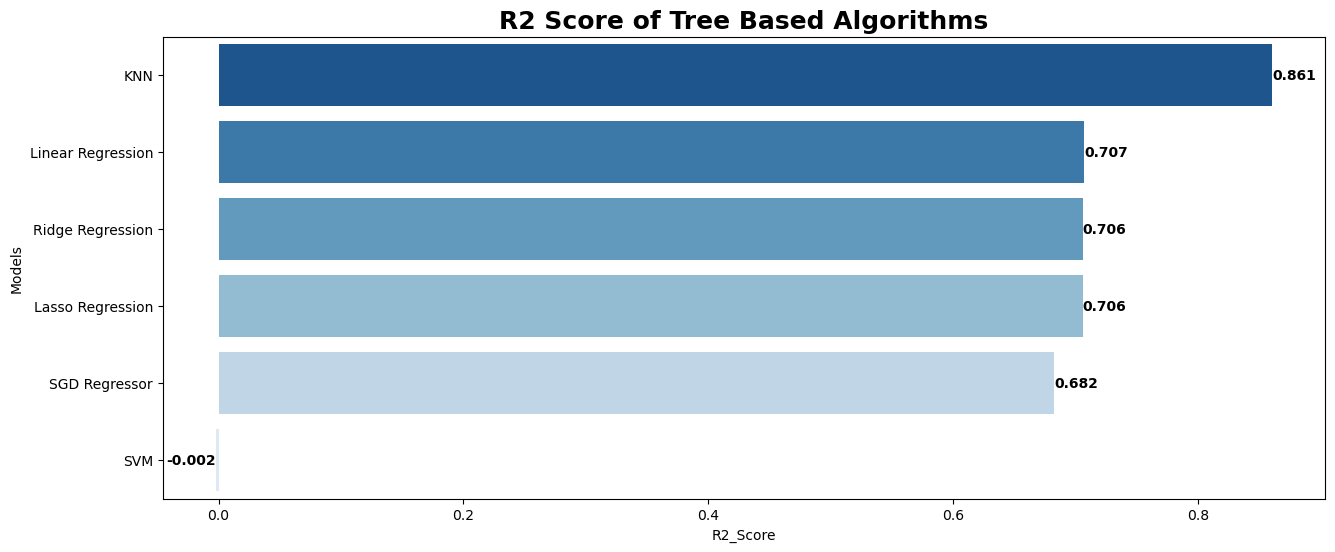

In [112]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=results_df.sort_values('R2_Score', ascending=False), x="R2_Score", y= "Name",palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontweight='bold')
plt.title("R2 Score of Tree Based Algorithms", fontsize= 18, weight='bold')
plt.ylabel("Models")
plt.show()

### 📝 Insights:
 " As we can observe, the <b>K-Nearest Neighbors (KNN)</b> algorithm achieved the highest performance with an <b>R² score of 0.86</b>, even without any hyperparameter tuning. On the other hand, the <b>Support Vector Machine (SVM)</b> model <b>performed the worst</b>, with an <b>R² score of -0.002.</b>

 Next, we will evaluate the tree-based algorithms and, if necessary, perform hyperparameter tuning on the distance-based models to further improve their performance".

<div style="
    background-color:#F9E795;
    border-left: 5px solid #b7950b;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Training on Tree Based Algorithms.   </h2></FONT></b>
</div>


In [115]:
! pip install lightgbm xgboost

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [117]:
tree_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Light Gradient Boosting": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in tree_models.items():
    model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 10682, number of used features: 33
[LightGBM] [Info] Start training from score 9087.214567


## 🧐 Model Evaluation.

In [119]:
tree_results=[]

for name, model in tree_models.items():
    y_pred= model.predict(x_train)
    r2= r2_score(y_train, y_pred)
    mae= mean_absolute_error(y_train, y_pred),
    mse= mean_squared_error(y_train, y_pred),
    rmse= root_mean_squared_error(y_train, y_pred),
    tree_results.append([name, mae, mse, rmse, r2])

In [120]:
tree_results

[['Decision Tree',
  (48.44176184235162,),
  (103881.19127348188,),
  (322.3060521825209,),
  0.995114781866712],
 ['Random Forest',
  (254.84266938867367,),
  (377655.9967876916,),
  (614.5372216454359,),
  0.9822399810684193],
 ['Gradient Boosting',
  (1244.445438704806,),
  (3609451.534919143,),
  (1899.8556616014657,),
  0.8302584147000192],
 ['Light Gradient Boosting',
  (818.3020755720557,),
  (2018770.923229751,),
  (1420.8345868642666,),
  0.9050633112672616],
 ['XGBoost',
  (532.5792252098302,),
  (726360.2036579736,),
  (852.2676831007811,),
  0.9658414721488953]]

In [121]:
tree_results_df=pd.DataFrame(tree_results,columns=["Name", "MAE", "MSE", "RMSE", "R2_Score"])
tree_results_df

,Name,MAE,MSE,RMSE,R2_Score
0,Decision Tree,"(48.44176184235162,)","(103881.19127348188,)","(322.3060521825209,)",0.995115
1,Random Forest,"(254.84266938867367,)","(377655.9967876916,)","(614.5372216454359,)",0.982240
2,Gradient Boosting,"(1244.445438704806,)","(3609451.534919143,)","(1899.8556616014657,)",0.830258
3,Light Gradient Boosting,"(818.3020755720557,)","(2018770.923229751,)","(1420.8345868642666,)",0.905063
4,XGBoost,"(532.5792252098302,)","(726360.2036579736,)","(852.2676831007811,)",0.965841


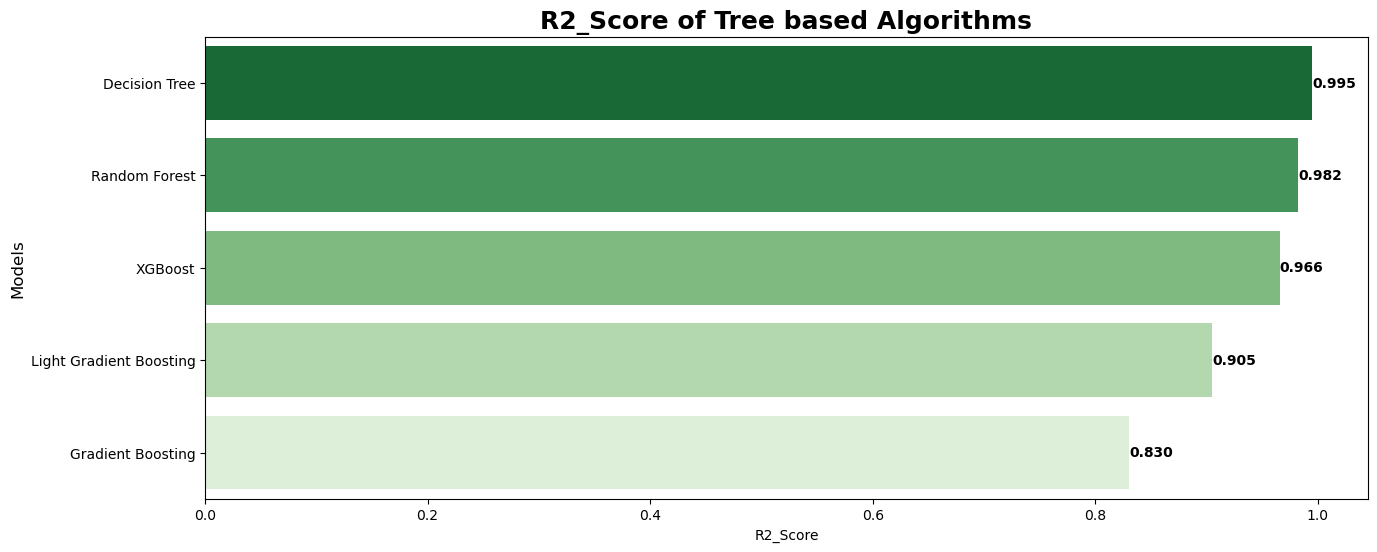

In [122]:
plt.figure(figsize=(15,6))
ax=sns.barplot(tree_results_df.sort_values("R2_Score", ascending=False), x= "R2_Score", y="Name", palette="Greens_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontweight='bold')
plt.title("R2_Score of Tree based Algorithms", fontsize= 18, weight='bold')
plt.ylabel("Models", fontsize=12)
plt.show()

### 📝 Insights:
- From the comparison of tree-based algorithms, it is evident that the Decision Tree model delivered the best performance even without any hyperparameter tuning.
It achieved an R² score of 0.995 and an RMSE of 322.30, which indicates a near-perfect fit on the training data but it can be a sign of <b>Overfitting</b>.

- Moreover, all other tree-based models — except Gradient Boosting — also performed remarkably well, each achieving an R² score above 0.9. This suggests that ensemble and boosting methods are effectively capturing complex relationships within the dataset.

- To obtain a more reliable and unbiased estimate of model performance, cross-validation should be used. 

<div style="
    background-color:#F9E795;
    border-left: 5px solid #b7950b;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Cross Validation Tree Based Algorithms.   </h2></FONT></b>
</div>


In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
cv_tree_results=[]

for name, model in tree_models.items():
    cv_scores=cross_val_score(estimator= model, X= x_train, y= y_train, cv=5, scoring='r2')
    y_pred= model.predict(x_train)
    r2= r2_score(y_train, y_pred)
    mae= mean_absolute_error(y_train, y_pred),
    mse= mean_squared_error(y_train, y_pred),
    rmse= root_mean_squared_error(y_train, y_pred), 
    mean_cv_score= np.mean(cv_scores)
    
    cv_tree_results.append([name, mae, mse, rmse, r2, mean_cv_score])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 33
[LightGBM] [Info] Start training from score 9073.996957
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 33
[LightGBM] [Info] Start training from score 9051.581042
[LightGBM] [Warning] Found

In [127]:
cv_tree_results

[['Decision Tree',
  (48.44176184235162,),
  (103881.19127348188,),
  (322.3060521825209,),
  0.995114781866712,
  0.836488515938359],
 ['Random Forest',
  (254.84266938867367,),
  (377655.9967876916,),
  (614.5372216454359,),
  0.9822399810684193,
  0.8949859957614267],
 ['Gradient Boosting',
  (1244.445438704806,),
  (3609451.534919143,),
  (1899.8556616014657,),
  0.8302584147000192,
  0.8188692621741618],
 ['Light Gradient Boosting',
  (818.3020755720557,),
  (2018770.923229751,),
  (1420.8345868642666,),
  0.9050633112672616,
  0.8586293916450904],
 ['XGBoost',
  (532.5792252098302,),
  (726360.2036579736,),
  (852.2676831007811,),
  0.9658414721488953,
  0.897441816329956]]

In [128]:
cv_tree_results_df= pd.DataFrame(cv_tree_results, columns=["Model", "MAE", "MSE", "RMSE", "R2", "Mean_R2_score"])
cv_tree_results_df.sort_values("Mean_R2_score",ascending=False)

,Model,MAE,MSE,RMSE,R2,Mean_R2_score
4,XGBoost,"(532.5792252098302,)","(726360.2036579736,)","(852.2676831007811,)",0.965841,0.897442
1,Random Forest,"(254.84266938867367,)","(377655.9967876916,)","(614.5372216454359,)",0.982240,0.894986
3,Light Gradient Boosting,"(818.3020755720557,)","(2018770.923229751,)","(1420.8345868642666,)",0.905063,0.858629
0,Decision Tree,"(48.44176184235162,)","(103881.19127348188,)","(322.3060521825209,)",0.995115,0.836489
2,Gradient Boosting,"(1244.445438704806,)","(3609451.534919143,)","(1899.8556616014657,)",0.830258,0.818869


### 📝 Insights:
- As we can see, the Decision Tree Regressor showed signs of overfitting, achieving an average R² score of 0.83 after 5-fold cross-validation one of the lowest among all models.
- In contrast, XGBoost performed consistently well with a higher mean R² score of 0.89, indicating better generalization and more stable performance across folds.
- In the next step, we will focus on hyperparameter tuning to further optimize these models and potentially improve their generalization performance.

<div style="
    background-color:#F9E795;
    border-left: 5px solid #b7950b;
    padding: 10px;
    border-radius: 5px;
">
<h2>📊<b><font color='Grey'> Hyperparameter Tuning.   </h2></FONT></b>
</div>


In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
param_grids={
    "Decision Tree": {
        'max_depth': [None,10,20,30],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4]
    },
    "Random Forest": {
        'n_estimators': [100,200],
        'max_depth': [None,10,20],
        'min_samples_split': [2,5],
        'min_samples_leaf': [1,2]
    },
    "XGBoost": {
        'n_estimators': [100,200],
        'max_depth': [3,5],
        'learning_rate': [0.05,0.1],
        'subsample': [0.8,1]
    },
    "Gradient Boosting": {
        'n_estimators': [100,200],
        'max_depth': [3,5],
        'learning_rate': [0.05,0.1],
        'subsample': [0.8,1]
    },
    "Light Gradient Boosting": {
        'n_estimators': [100,200],
        'max_depth': [-1,10,20],
        'learning_rate': [0.05,0.1],
        'num_leaves': [31,50,100]
    }
}

In [133]:
hyper_results= []

for name, model in tree_models.items():
    random_search= RandomizedSearchCV(
        estimator= model,
        param_distributions=param_grids[name],
        scoring='r2',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    
    random_search.fit(x_train, y_train)
    
    best_model= random_search.best_estimator_
    y_pred= best_model.predict(x_train)
    
    rmse= root_mean_squared_error(y_train,y_pred)
    mae= mean_absolute_error(y_train, y_pred)
    mse= mean_squared_error(y_train, y_pred)
    r2= r2_score(y_train, y_pred)
    
    hyper_results.append([name, random_search.best_params_, mae, mse, rmse, r2])
    

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 10682, number of used features: 33
[LightGBM] [Info] Start training from score 9087.214567
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [134]:
hyper_results

[['Decision Tree',
  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30},
  428.00104789840793,
  1055117.7253098597,
  1027.1892353942674,
  0.9503810056349137],
 ['Random Forest',
  {'n_estimators': 200,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'max_depth': 20},
  279.8188836453354,
  408687.4380730123,
  639.2866634562404,
  0.9807806662703245],
 ['Gradient Boosting',
  {'subsample': 0.8,
   'n_estimators': 200,
   'max_depth': 5,
   'learning_rate': 0.1},
  742.9872952511658,
  1330207.8182855537,
  1153.3463566013263,
  0.9374443508467065],
 ['Light Gradient Boosting',
  {'num_leaves': 100,
   'n_estimators': 200,
   'max_depth': 20,
   'learning_rate': 0.1},
  430.91775820575134,
  657872.3488051258,
  811.0933046235346,
  0.9690622538269639],
 ['XGBoost',
  {'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
  806.3101690421277,
  1629637.7925320494,
  1276.5726742070149,
  0.9233630895614624]]

In [135]:
hyper_results_df= pd.DataFrame(hyper_results, columns= ['Model', 'Best Params', 'MAE', 'MSE', 'RMSE', 'R2_Score'])
hyper_results_df.sort_values('R2_Score', ascending=False)

,Model,Best Params,MAE,MSE,RMSE,R2_Score
1,Random Forest,"{'n_estimators': 200, 'min_samples_split': 2, ...",279.818884,4.086874e+05,639.286663,0.980781
3,Light Gradient Boosting,"{'num_leaves': 100, 'n_estimators': 200, 'max_...",430.917758,6.578723e+05,811.093305,0.969062
0,Decision Tree,"{'min_samples_split': 10, 'min_samples_leaf': ...",428.001048,1.055118e+06,1027.189235,0.950381
2,Gradient Boosting,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",742.987295,1.330208e+06,1153.346357,0.937444
4,XGBoost,"{'subsample': 1, 'n_estimators': 200, 'max_dep...",806.310169,1.629638e+06,1276.572674,0.923363


### 📝 Insights:
"The evaluation indicates that all models are highly effective, with the <b>Gradient Boosting</b> algorithm, in particular, achieving an <b>$R^2$ score greater than 0.90</b>. However, a key observation is the shift in relative performance. The <b>Decision Tree's $R^2$ score decreased slightly</b>. Consequently, the <b>Random Forest model has surpassed it to become the optimal model in this analysis,that's why we will use Random Forest for Prediction on test dataset</b>."

<div style="
    background-color:#dcdcdc;
    border-left: 5px solid #696969;
    padding: 10px;
    border-radius: 5px;
">
<h2>🕵️‍♂️<font color='Grey'> Predicting on Test Data.   </h2></FONT>
</div>


 "As observed earlier, the test dataset contains only <b>10 columns</b>, whereas the <b>training dataset has 11</b>. <b>The missing column in the test dataset is the ‘Price’</b>, which represents our target variable. Consequently, we can only use our best-performing model to generate price predictions for the test data. Since the actual prices are not available, we are unable to compute evaluation metrics (such as RMSE, MAE, or R²) for these predictions".

In [139]:
original_test=test.copy()

## 🧹 Preprocessing of test dataset.

In [141]:
test['journey_Date']=pd.to_datetime(test['Date_of_Journey'],dayfirst=True).dt.day
test['journey_Month']= pd.to_datetime(test['Date_of_Journey'],dayfirst=True).dt.month
test['journey_Day']=pd.to_datetime(test['Date_of_Journey'],dayfirst=True).dt.day_name()
test.drop(columns='Date_of_Journey',inplace=True)
test['duration']=(pd.to_timedelta(test['Duration']).dt.total_seconds() // 60).astype(int)
test['Dep_Time'].replace(":",".",regex=True,inplace=True)
test['Dep_Time']=test['Dep_Time'].astype(float)
test['Arrival_Time']=test['Arrival_Time'].str.split().str[0]
test['Arrival_Time'].replace(':','.',regex=True,inplace=True)
test['Arrival_Time']=test['Arrival_Time'].astype(float)

for col in test.select_dtypes(include='object').columns:
    test[col]=test[col].astype('category')

test['Dep_minutes']=(test['Dep_Time']*60).astype(int)
test['Arrival_minutes']=(test['Arrival_Time']*60).astype(int)
test.drop(columns=['Route','Dep_Time','Arrival_Time','Duration'],inplace=True)

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          2671 non-null   category
 1   Source           2671 non-null   category
 2   Destination      2671 non-null   category
 3   Total_Stops      2671 non-null   category
 4   Additional_Info  2671 non-null   category
 5   journey_Date     2671 non-null   int32   
 6   journey_Month    2671 non-null   int32   
 7   journey_Day      2671 non-null   category
 8   duration         2671 non-null   int32   
 9   Dep_minutes      2671 non-null   int32   
 10  Arrival_minutes  2671 non-null   int32   
dtypes: category(6), int32(5)
memory usage: 69.5 KB


# 🧩 Encoding Categorical Columns.

In [144]:
test=pd.get_dummies(test,columns=test.select_dtypes(include='category').columns, drop_first=True, dtype=int)
test.head()

,journey_Date,journey_Month,duration,Dep_minutes,Arrival_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,journey_Day_Monday,journey_Day_Saturday,journey_Day_Sunday,journey_Day_Thursday,journey_Day_Tuesday,journey_Day_Wednesday
0,6,6,655,1038,255,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,12,5,240,372,612,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,21,5,1425,1149,1140,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,21,5,780,480,1260,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,6,170,1413,147,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [145]:
x_train, test = x_train.align(test, join='left', axis=1, fill_value=0)

In [146]:
test_scaled=preprocessor.transform(test)
test_scaled

array([[ 0.02359068,  0.76568454, -1.39413203, ...,  1.        ,
         0.        ,  0.        ],
       [-0.79364996, -1.16497848, -0.52194708, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5399167 ,  1.08746171,  0.76800714, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.48841551,  1.49620568, -1.39413203, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53559687, -1.54763241,  0.789995  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42728787, -1.45196893,  0.789995  , ...,  0.        ,
         0.        ,  0.        ]])

In [147]:
scaled_test=pd.DataFrame(test_scaled,
             columns=original_cols + dummy_cols,
             index=test.index)
scaled_test.head()

,duration,Dep_minutes,Arrival_minutes,journey_Date,journey_Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,journey_Day_Monday,journey_Day_Saturday,journey_Day_Sunday,journey_Day_Thursday,journey_Day_Tuesday,journey_Day_Wednesday
0,0.023591,0.765685,-1.394132,6.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.793650,-1.164978,-0.521947,12.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.539917,1.087462,0.768007,21.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.269748,-0.851898,1.061179,21.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.931498,1.852770,-1.657986,24.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [148]:
best_model=hyper_results_df.sort_values('R2_Score', ascending=False).iloc[0]
best_model_name=best_model['Model']
best_model_params= best_model['Best Params']
best_model_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [149]:
final_model= final_model = type(tree_models[best_model_name])(**best_model_params, random_state=42)
final_model

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [150]:
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [151]:
pred_y= final_model.predict(x_train)

In [152]:
r2_score(y_train, pred_y)

0.9807806662703245

In [153]:
test_pred_y=final_model.predict(test)
test_pred_y

array([14709.23      ,  4367.005     , 12898.        , ...,
       15725.915     , 13327.64622178,  7558.92688909])

In [156]:
original_test['Predicted_Price']= test_pred_y

In [157]:
original_test.to_excel(r"C:\Users\shashnk\Downloads\ML Advanced Exam Paper\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Predicted_Filght_Price.xlsx", index=False)

 # 🏆 Conclusion and Final Prediction.

Our analysis indicates that the **Random Forest Regressor** with Hyperparameter Tuning provides the best balance between predictive power and generalization, achieving a **Mean Cross-Validated R² Score of ~0.98**.

That's why we used it to Predict the Prices on test data, which ealier did not contain the price column in it and we can recommend it to deploy it in Production.

---